## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

## Importing the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Shashikanth\Downloads\emotions.csv")

In [3]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0
...,...,...
11995,i feel weird using his first name but the alte...,5
11996,i read them i feel pleasantly surprised that t...,5
11997,i feel a strange sense of guilt about it all,5
11998,i let people know how i m actually feeling and...,5


In [4]:
df['label'] = df['label'].map({0:'sad',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'})

In [5]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,sad
1,i dont know i feel so lost,sad
2,i was beginning to feel quite disheartened,sad
3,i can still lose the weight without feeling de...,sad
4,im feeling a little like a damaged tree and th...,sad


## Exploratory Data Analysis

In [6]:
# Missing values
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
#Duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

<Axes: >

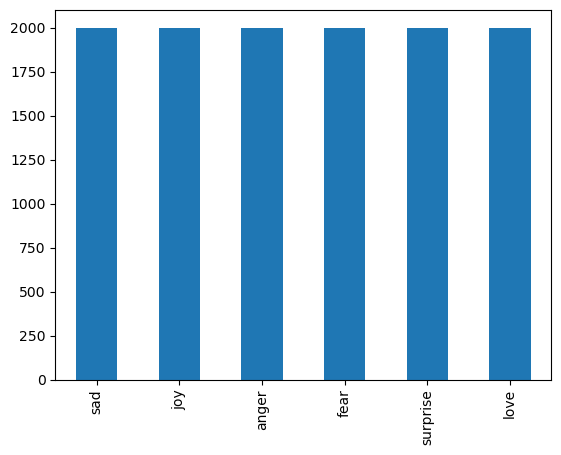

In [9]:
#Distribution
df['label'].value_counts().plot(kind='bar')

## Splitting the Data

In [10]:
X = df['text']
y = df['label']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [22]:
pipe = Pipeline([("Vectorozation", CountVectorizer(stop_words='english')),
         ("Estimator", MultinomialNB(alpha=3))])

In [23]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorozation', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=3))])

In [24]:
pipe.predict(X_test)

array(['love', 'sad', 'fear', ..., 'fear', 'love', 'fear'], dtype='<U8')

## Creating the Pickle file

In [25]:
import pickle

In [26]:
pickle.dump(pipe,open("Estimator.pkl",'wb'))

In [27]:
import os
os.getcwd()

'C:\\Users\\Shashikanth\\OneDrive\\Documents\\Mentoring\\Data Science\\Machine Learning\\Daily task'

In [28]:
predict= pickle.load(open("Estimator.pkl",'rb'))

In [31]:
predict.predict(["i hate you"])

array(['anger'], dtype='<U8')

In [12]:
#y_train.unique()

array(['sad', 'surprise', 'fear', 'love', 'joy', 'anger'], dtype=object)

In [13]:
#bow = CountVectorizer(stop_words='english')

In [14]:
#bow.fit(X_train)

CountVectorizer(stop_words='english')

In [15]:
#X_train_bow = pd.DataFrame(bow.transform(X_train).todense(),columns=bow.get_feature_names_out())

In [16]:
#X_test_bow = pd.DataFrame(bow.transform(X_test).todense(),columns=bow.get_feature_names_out())

In [17]:
#y_train

105           sad
10763    surprise
8970         fear
8421         fear
8211         fear
           ...   
8448         fear
2934          joy
10384    surprise
6619        anger
8511         fear
Name: label, Length: 8999, dtype: object

In [46]:
#mnb = MultinomialNB(alpha=19)


In [47]:
#mnb.fit(X_train_bow,y_train)

MultinomialNB(alpha=19)

In [48]:
#y_pred = mnb.predict(X_test_bow)

In [49]:
#accuracy_score(y_test,y_pred)

0.8156666666666667

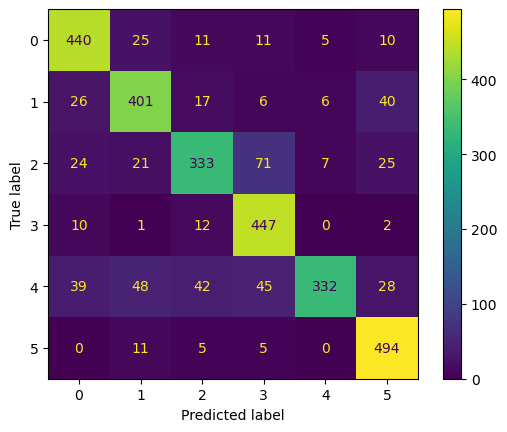

In [50]:
#ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [44]:
#import warnings
#warnings.filterwarnings('ignore')

In [45]:
#text = input('enter the test:: ')
#mnb.predict(bow.transform([text]).toarray())[0]

enter the test:: df


'love'